In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# Load data set and display first few observations
df = pd.read_csv("pima-indians-diabetes.data", names = names)
df.head()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
X=df.iloc[:,0:8]

In [56]:
y=dataset.iloc[:,8]

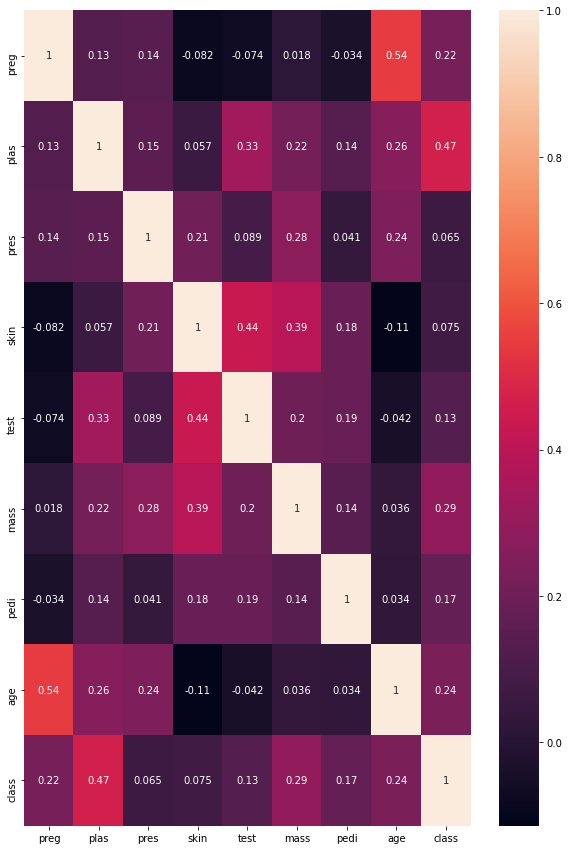

In [63]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [79]:
from scipy.stats import zscore
X=X.apply(zscore)

In [87]:
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [88]:
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
X_std.shape

(768, 8)

In [89]:
cov_matrix = np.cov(X_std, rowvar=False)
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
# Make pair of eigenvalue, eigenvector
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Do it in descending ordered
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# sorted eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)


Eigenvalues in descending order: 
[2.0971105579945277, 1.7334672594471259, 1.0309722810083828, 0.8766705419094795, 0.7633383156496742, 0.6835183858447278, 0.42036352804956756, 0.40498937781489847]


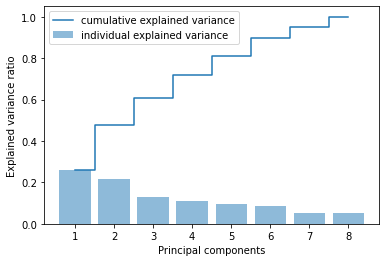

In [83]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [84]:
P_reduce = np.array(eigvectors_sort[0:8]).transpose()
Proj_data_2D = np.dot(X_std,P_reduce)

In [69]:
Proj_data_2D.shape

(768, 8)

In [44]:
y.shape

(768,)

In [85]:
from sklearn import model_selection

test_size = 0.30
seed = 11 
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, y, test_size=test_size, random_state=seed)

In [86]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)
acc=metrics.accuracy_score(y_test, y_predict)
print(acc)

0.7878787878787878


In [ ]:
#0.7878787878787878